Elapsed time: 0.0402 seconds


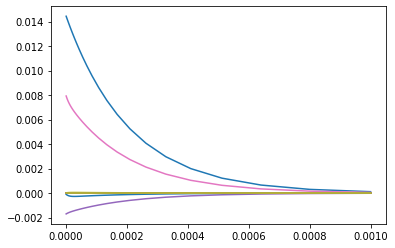

In [4]:
# import sys
# sys.path.insert(0, './')
# # sys.path.insert(0, '../')
import rotational_diffusion_photophysics as rdp
import numpy as np
import matplotlib.pyplot as plt
import codetiming

# Maximum l value for SH expansion
# lmax=6 is enough for good accuracy, with reasonable level of saturation.
# At high levels of satuaration use lmax=12 or lmax=20. After that it will be quite slow.
lmax = 6

# Objective parameters
numerical_aperture = 1.4
refractive_index = 1.518


# Create the illumination scheme
exc488X = rdp.ModulatedLasers(power_density=[3000],
                         wavelength=[488],
                         polarization=['x'],
                         modulation=[[1]],
                         time_windows=[0],
                         time0=0,
                         numerical_aperture=numerical_aperture,
                         refractive_index=refractive_index,
                         )

# Create the detectors
detXY = rdp.PolarizedDetection(polarization=['x', 'y'],
                               numerical_aperture=numerical_aperture,
                               refractive_index=refractive_index,
                               )

# Create the fluorophore, with the photophysics
rsEGFP2_100us = rdp.NegativeSwitcher(cross_section_on=[2e-15, 0],
                                     lifetime_on=3e-9,
                                     quantum_yield_on_to_off=0.001,
                                     diffusion_coefficient=1/(6*10e-6))

# Full system and experiment
starss2 = rdp.System(illumination=exc488X,
                     fluorophore=rsEGFP2_100us,
                     detection=detXY,
                     lmax=lmax)

# Solve the time evolution and time it for pesrformances
t = np.logspace(-6, -3, 32)

# Compute signals, it includes the analytical solution of the problem
timer = codetiming.Timer()
timer.start()
s = starss2.detector_signals(t)
timer.stop()

c = starss2._c
r = rdp.anisotropy(s)

plt.plot(t, c[1].T)
plt.show()

Elapsed time: 0.3034 seconds


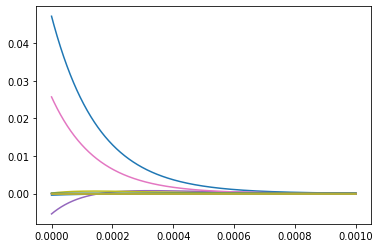

In [16]:
# Pulse sequence version
import rotational_diffusion_photophysics as rdp
import numpy as np
import matplotlib.pyplot as plt
import codetiming

# Maximum l value for SH expansion
# lmax=6 is enough for good accuracy, with reasonable level of saturation.
# At high levels of satuaration use lmax=12 or lmax=20. After that it will be quite slow.
lmax = 6

# Objective parameters
numerical_aperture = 1.4
refractive_index = 1.518


# Create the illumination scheme
exc488X = rdp.ModulatedLasers(power_density=[4000, 4000],
                              wavelength=[405, 488],
                              polarization=['x', 'xy'],
                              time_windows=[250e-9, 1e-3],
                              modulation=[[1,0], [1,1]],
                              time0=250e-9,
                              numerical_aperture=numerical_aperture,
                              refractive_index=refractive_index,
                              )

# Create the detectors
detXY = rdp.PolarizedDetection(polarization=['x', 'y'],
                               numerical_aperture=numerical_aperture,
                               refractive_index=refractive_index,
                               )

# Create the fluorophore, with the photophysics
rsEGFP2_100us = rdp.NegativeSwitcher(cross_section_on= [2e-17, 2e-15],
                                     cross_section_off=[8e-16, 1e-19],
                                     wavelength=[405, 488],
                                     lifetime_on=3e-9,
                                     lifetime_off=16e-12,
                                     quantum_yield_on_to_off=0.001,
                                     quantum_yield_off_to_on=0.1,
                                     starting_populations=[0,0,1,0],
                                     diffusion_coefficient=1/(6*200e6))

# Full system and experiment
starss2 = rdp.System(illumination=exc488X,
                     fluorophore=rsEGFP2_100us,
                     detection=detXY,
                     lmax=lmax)

# Solve the time evolution and time it for pesrformances
t = np.linspace(0, 1e-3, 1024)

# Compute signals, it includes the analytical solution of the problem
timer = codetiming.Timer()
timer.start()
s = starss2.detector_signals(t)
timer.stop()

c = starss2._c
r = rdp.anisotropy(s)

plt.plot(t, c[0].T)
# plt.xscale('log')
plt.show()

ipykernel_launcher:1: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:1: RuntimeWarning: invalid value encountered in log


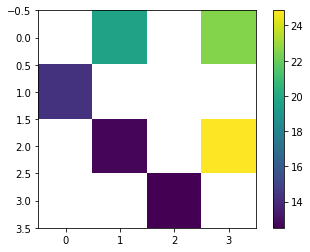

In [24]:
plt.imshow(np.log(starss2._K[1,:,:,0,0]))
plt.colorbar()

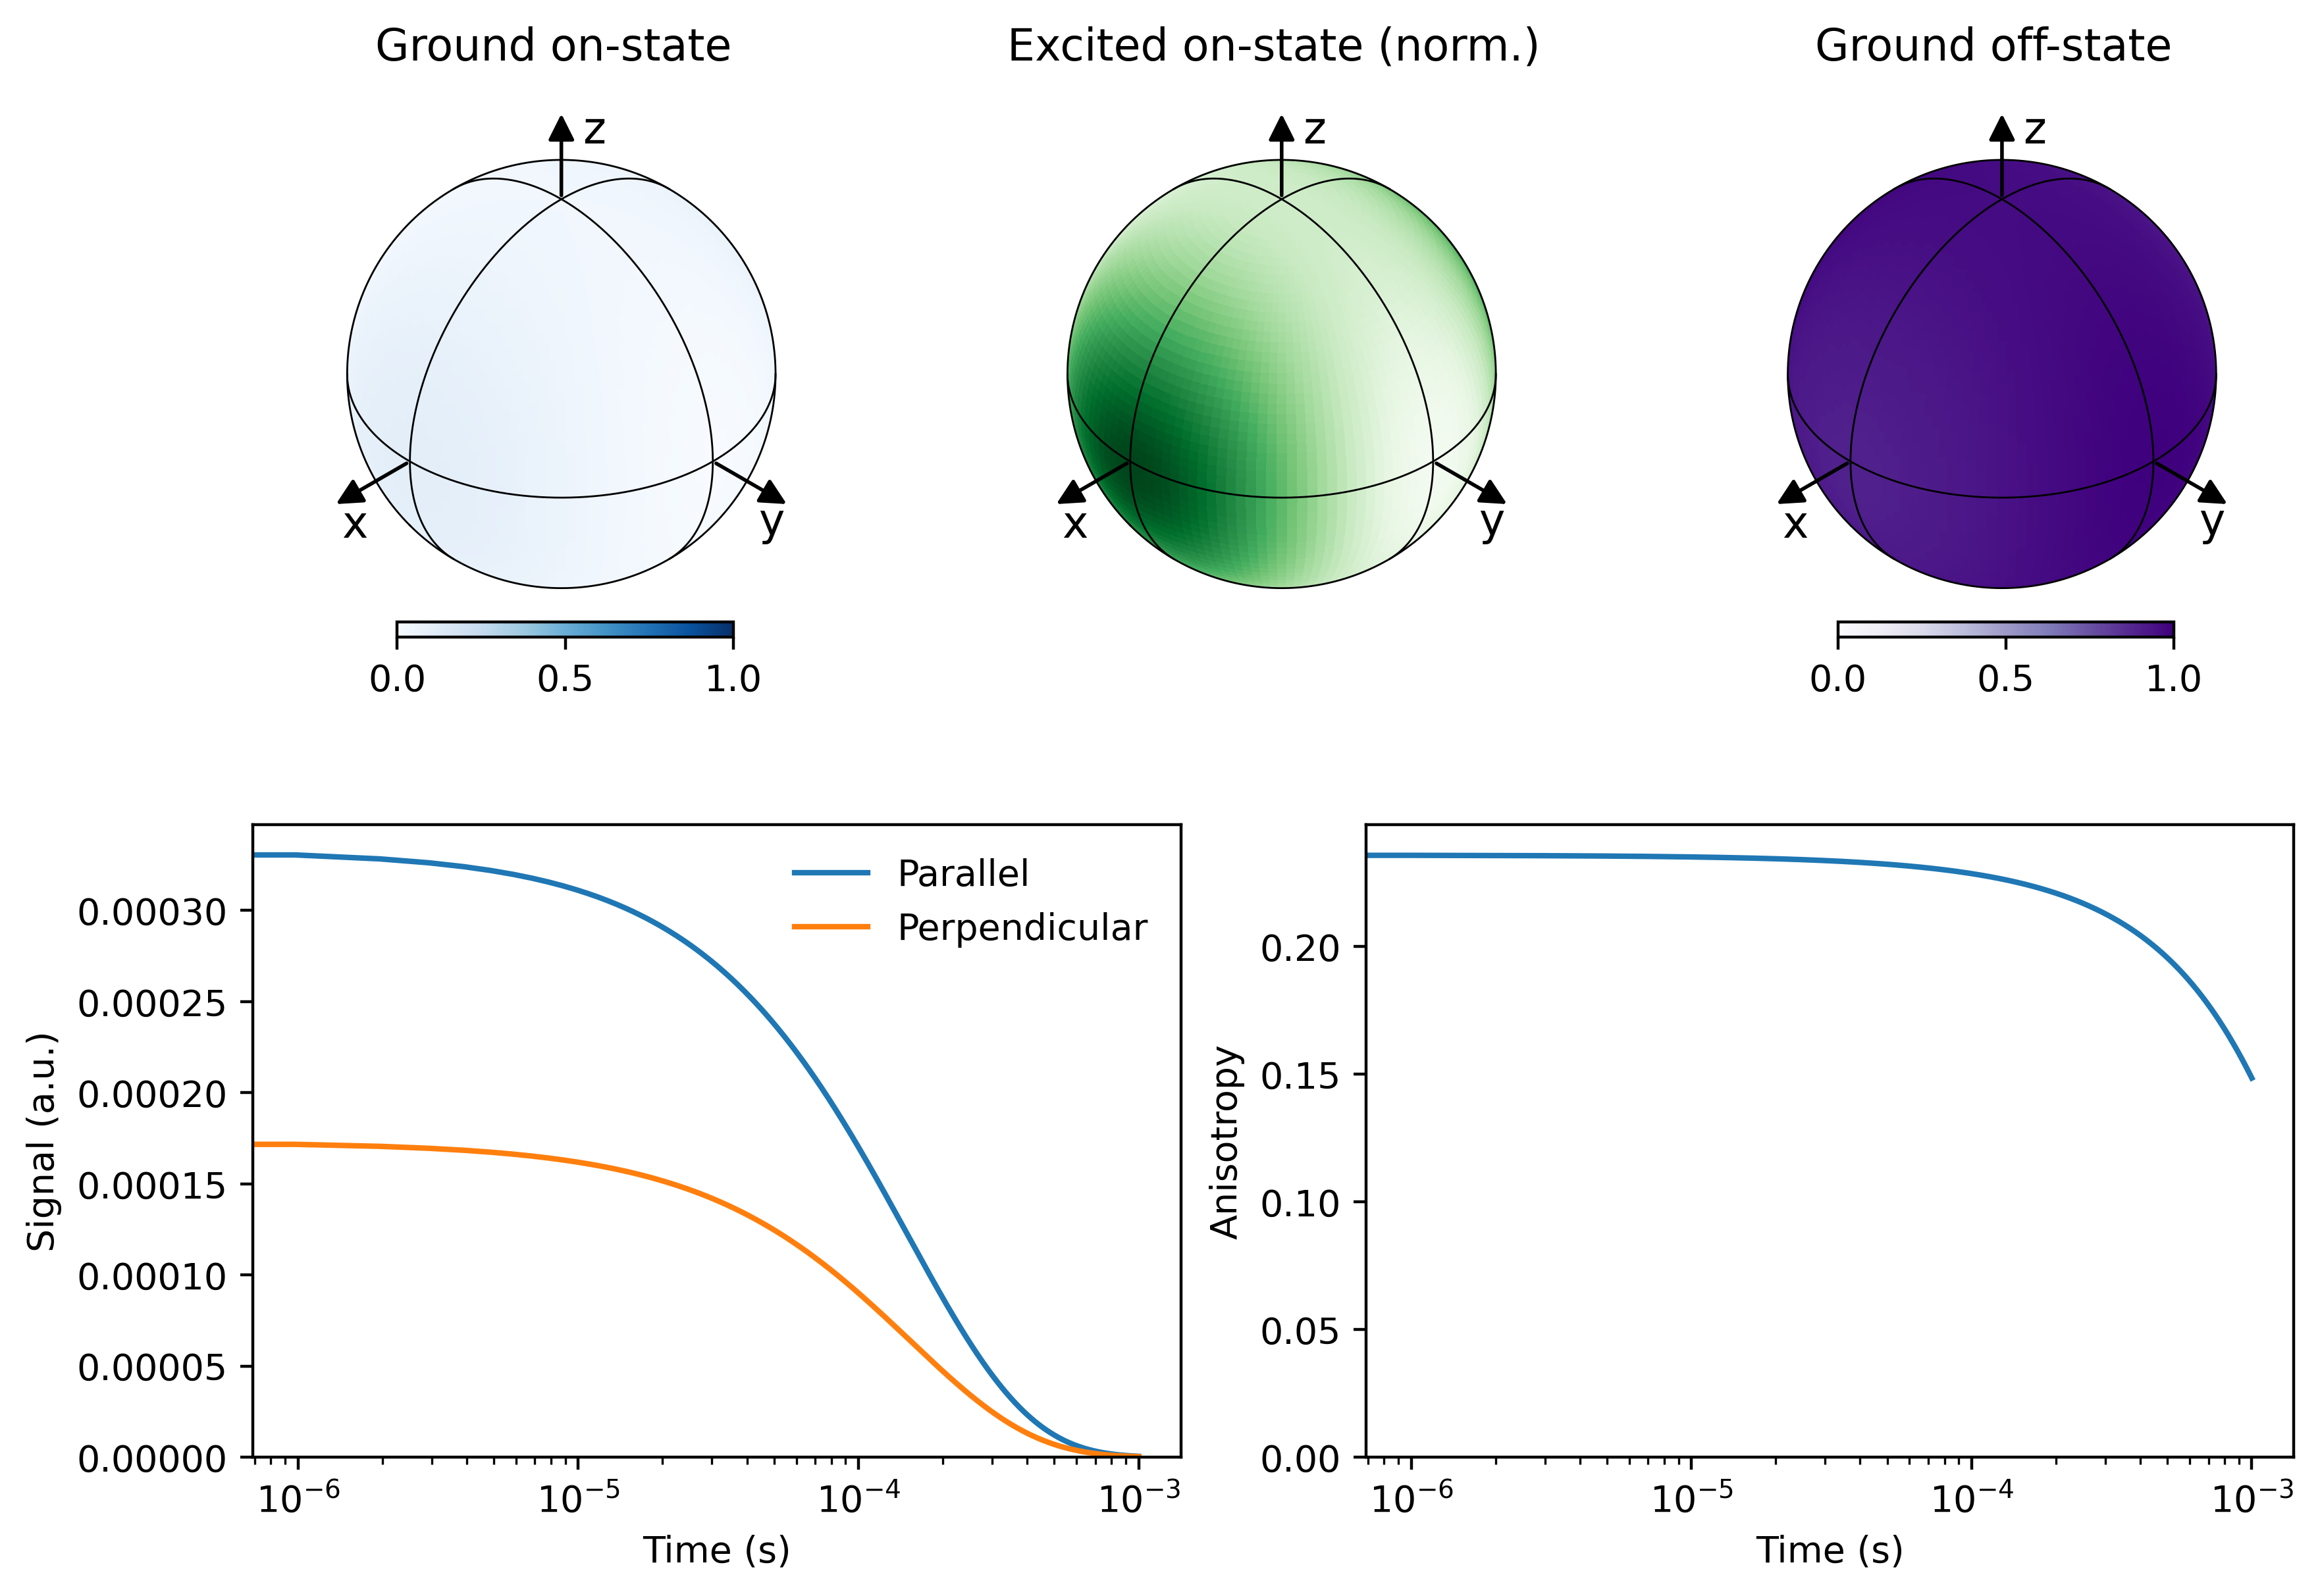

In [17]:
fig = plt.figure(dpi=400, figsize=[10,7])

from plot_data_sphere import plot_data_sphere

ax_sph0 = fig.add_subplot(231, projection='3d') 
ax_sph1 = fig.add_subplot(232, projection='3d') 
ax_sph2 = fig.add_subplot(233, projection='3d')

ax_sph0.set_title('Ground on-state')
ax_sph1.set_title('Excited on-state (norm.)')
ax_sph2.set_title('Ground off-state')

ax1 = fig.add_subplot(223) 
ax2 = fig.add_subplot(224) 

scale = 3
lmax = 32

grid0 = rdp.vec2grid(c[0,:,0], lmax=lmax)
grid1 = rdp.vec2grid(c[1,:,0], lmax=lmax) 
grid2 = rdp.vec2grid(c[2,:,0], lmax=lmax)

cmap0 = plt.cm.Blues
cmap1 = plt.cm.Greens
cmap2 = plt.cm.Purples

sph0 = plot_data_sphere(ax_sph0, grid0.data, scale=scale, cmap=cmap0)
sph1 = plot_data_sphere(ax_sph1, grid1.data, scale=scale, cmap=cmap1, vmax=[], plot_colorbar=False)
sph2 = plot_data_sphere(ax_sph2, grid2.data, scale=scale, cmap=cmap2)

ax1.plot(t, s[0], color='tab:blue')
ax1.plot(t, s[1], color='tab:orange')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Signal (a.u.)')
ax1.legend(['Parallel', 'Perpendicular'], loc='upper right', frameon=False)
ax1.set_ylim([0, 1.05*np.max(s)])
ax1.set_xscale('log')
line1, = ax1.plot([t[0], t[0]], ax1.get_ylim(), color=[0.8, 0.8, 0.8])

ax2.plot(t, r, color='tab:blue')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Anisotropy')
ax2.set_ylim([0, 1.05*np.max(r)])
ax2.set_xscale('log')
line2, = ax2.plot([t[0], t[0]], ax2.get_ylim(), color=[0.8, 0.8, 0.8])


In [14]:
# import matplotlib.animation as animation

# plt.rcParams['animation.ffmpeg_path'] = 'C:/Users/andre/Documents/ffmpeg/ffmpeg-4.3.2-2021-02-27-essentials_build/bin/ffmpeg.exe'

# def animate(i):
#     grid0 = rdp.vec2grid(c[0,:,i], lmax=lmax)
#     grid1 = rdp.vec2grid(c[1,:,i], lmax=lmax) 
#     grid2 = rdp.vec2grid(c[2,:,i], lmax=lmax)
    
#     data0 = grid0.data[0:-1,0:-1].flatten()
#     data1 = grid1.data[0:-1,0:-1].flatten(); data1 = data1/np.max(data1)
#     data2 = grid2.data[0:-1,0:-1].flatten()

#     sph0.set_facecolors(cmap0(data0))
#     sph1.set_facecolors(cmap1(data1))
#     sph2.set_facecolors(cmap2(data2))

#     line1.set_xdata([t[i], t[i]])
#     line2.set_xdata([t[i], t[i]])
#     return sph0, sph1, sph2, line1, line2

# ani = animation.FuncAnimation(
#     fig, animate, interval=400, blit=True, save_count=t.size)
# ani.save("starss_resolft_2_NA1p4_n1p518_D10us.mp4", bitrate=2000)

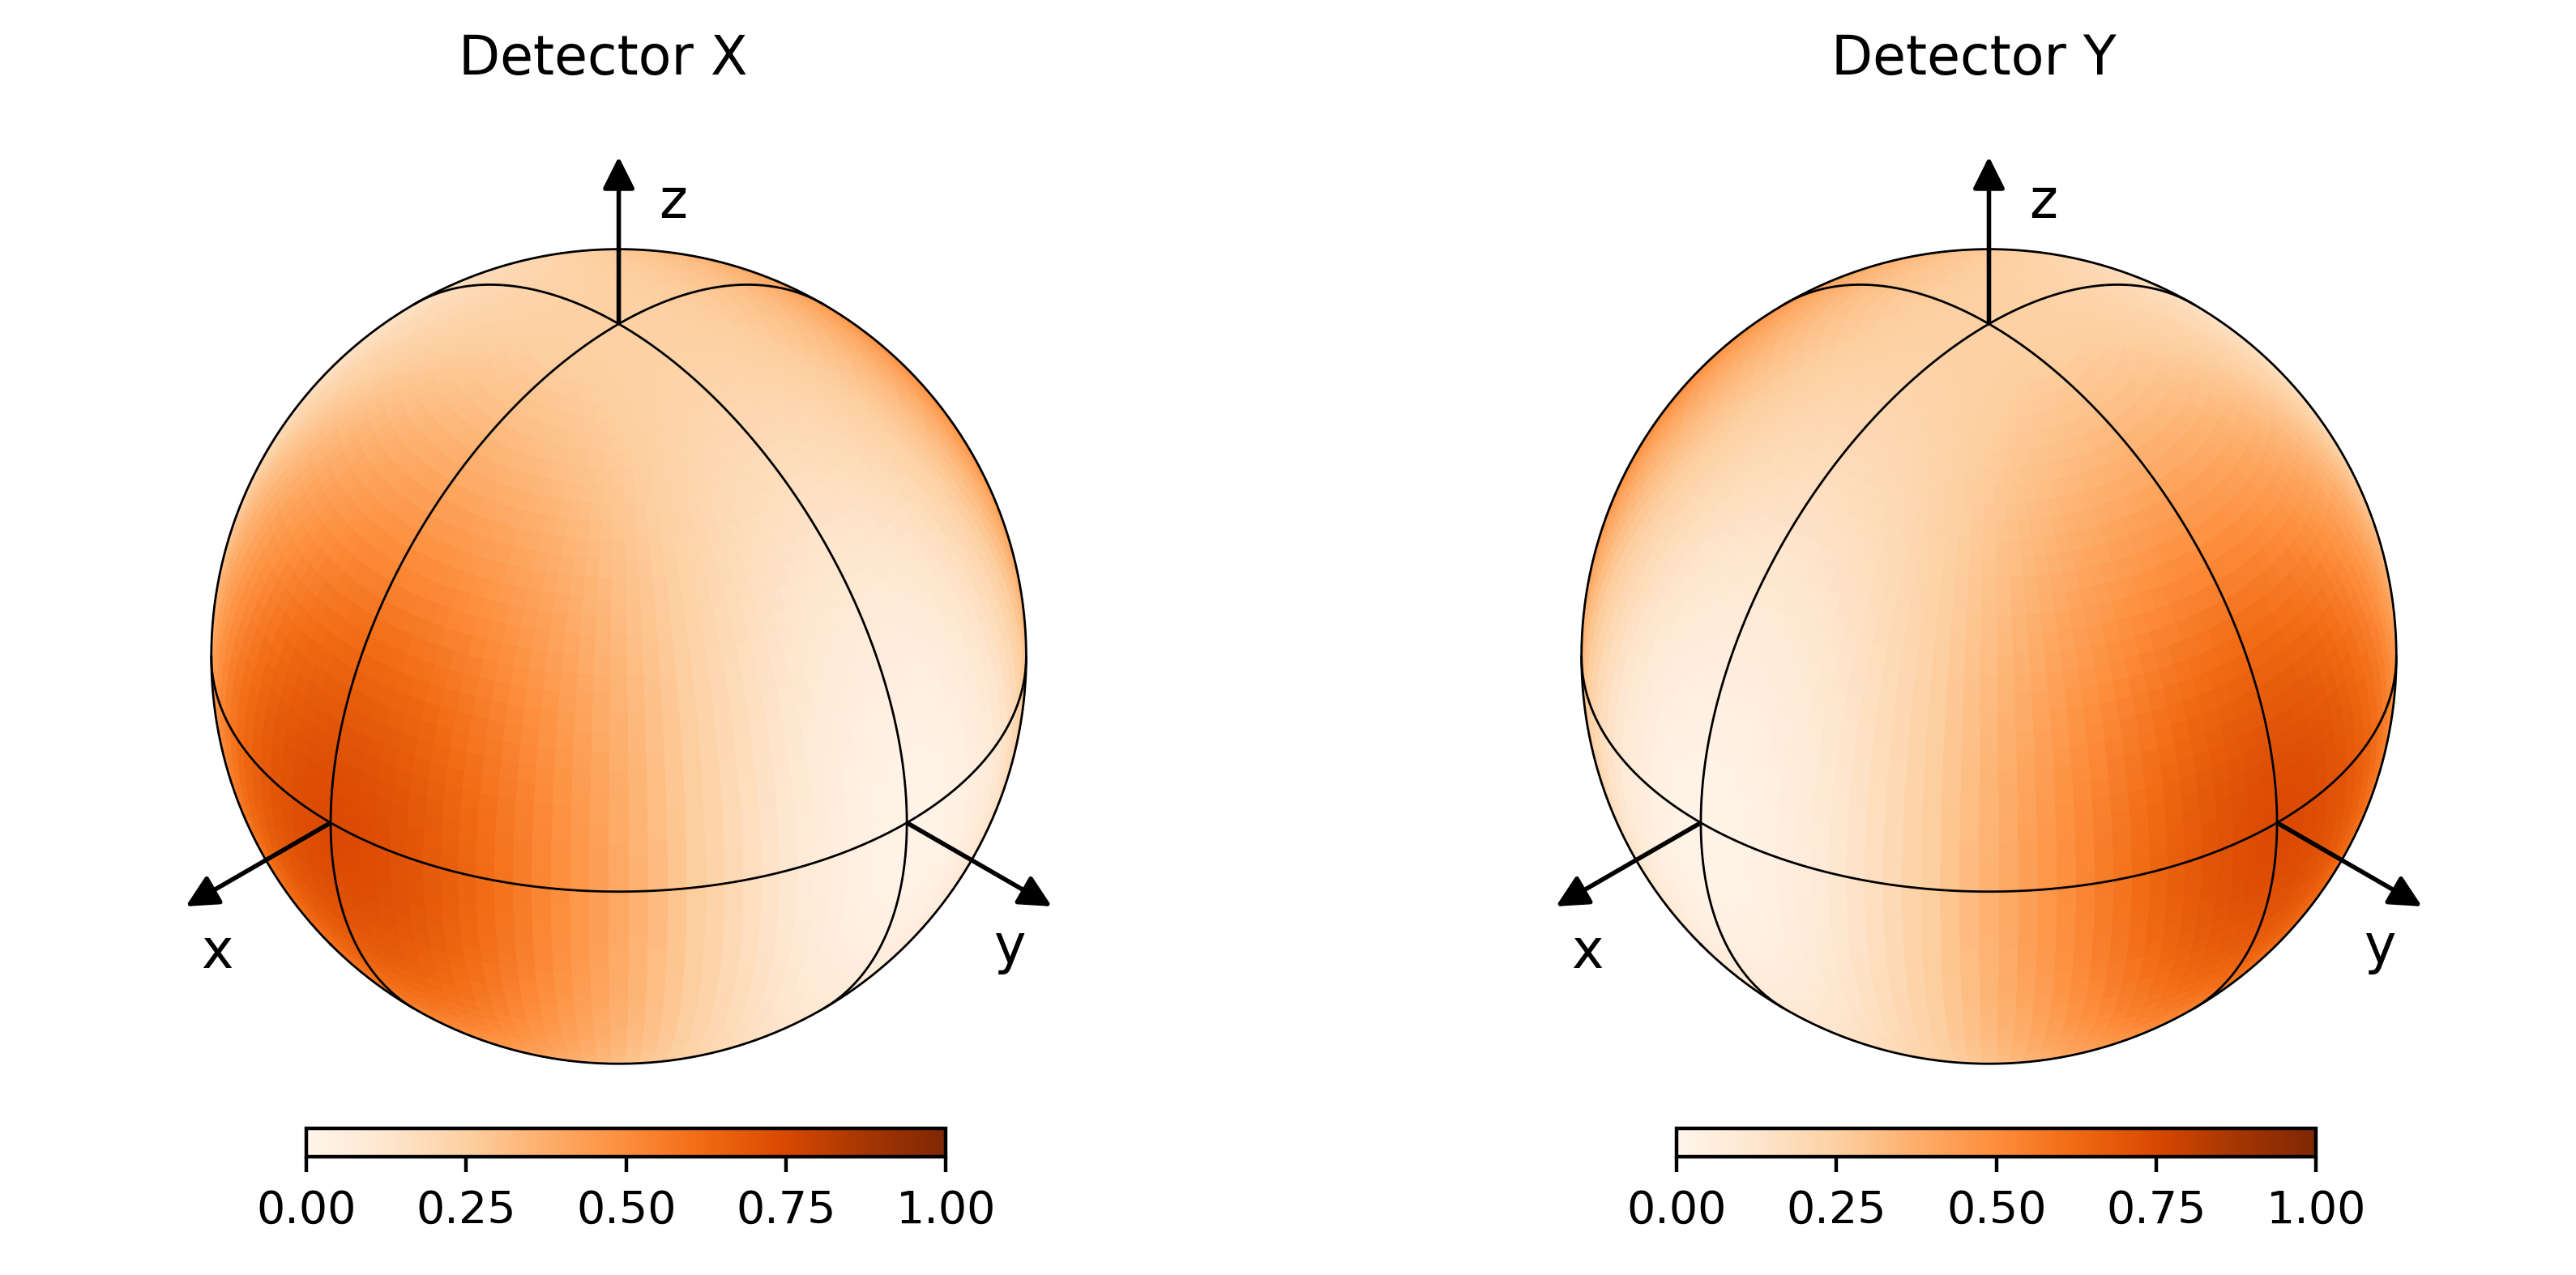

In [16]:
c_det = starss2._c_det

fig = plt.figure(dpi=400, figsize=[10,7])

from plot_data_sphere import plot_data_sphere


ax_sph0 = fig.add_subplot(121, projection='3d') 
ax_sph1 = fig.add_subplot(122, projection='3d') 

ax_sph0.set_title('Detector X')
ax_sph1.set_title('Detector Y')

scale = 3
lmax = 32

grid0 = rdp.vec2grid(c_det[0], lmax=lmax)
grid1 = rdp.vec2grid(c_det[1], lmax=lmax) 

cmap0 = plt.cm.Oranges
cmap1 = plt.cm.Oranges

sph0 = plot_data_sphere(ax_sph0, grid0.data, scale=scale, cmap=cmap0)
sph1 = plot_data_sphere(ax_sph1, grid1.data, scale=scale, cmap=cmap1)

# plt.savefig('detector_collection_NA0p5')